In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
dataset=pd.read_csv('delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#Null value and data types check
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#rename the Delivery Time column as delivery_time and Sorting Time Column as sorting_time
dataset1= dataset.rename({'Delivery Time': 'DT','Sorting Time': 'ST'}, axis=1)
dataset1.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
#Print the duplicated rows if present inside the data set
dataset1[dataset1.duplicated(keep = False)]

,DT,ST


Hence as per above process we found that there is no duplicate values are present inside the data set

In [6]:
#Correlation
dataset1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


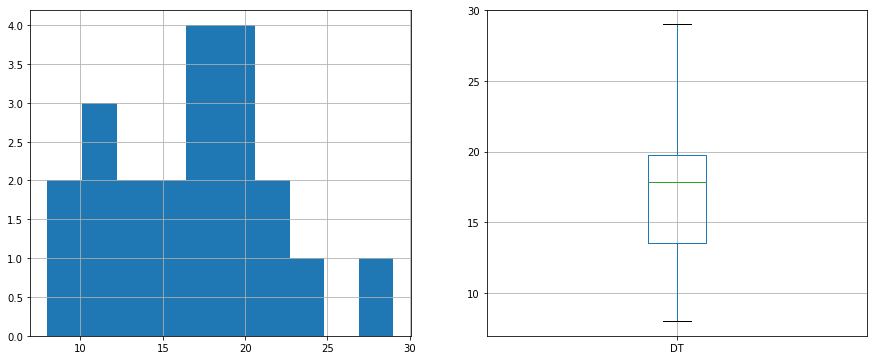

In [7]:
#Outlier checking
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
dataset1['DT'].hist()
plt.subplot(1,2,2)
dataset1.boxplot(column=['DT'])

plt.show()

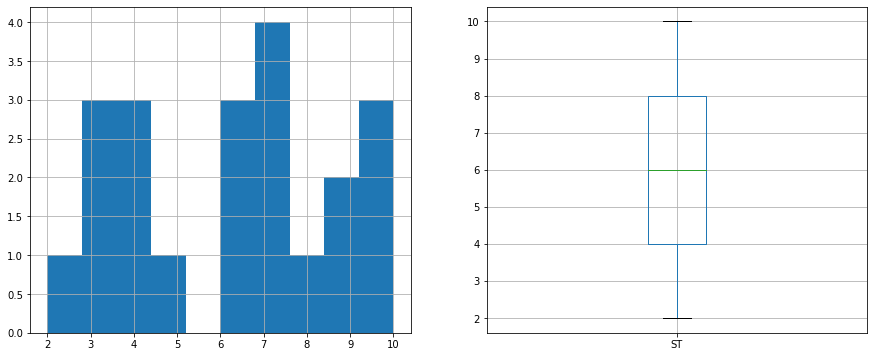

In [8]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
dataset1['ST'].hist()
plt.subplot(1,2,2)
dataset1.boxplot(column=['ST'])

plt.show()


From the above histogrms and boxplots, we found that there is no outleirs present inside the Delivery Time and Sorting Time variable.

C:\Users\sowmya sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

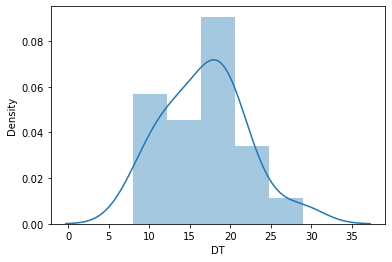

In [9]:
#Cheking of distribution of data using distplot
sns.distplot(dataset1['DT'])

C:\Users\sowmya sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

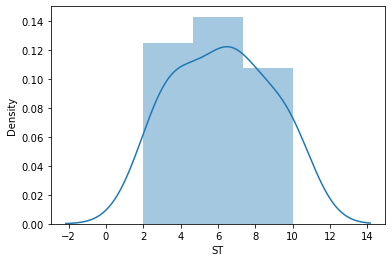

In [10]:
sns.distplot(dataset1['ST'])

#Model1-
Predict this model without applying transformation

In [11]:
dataset_1 = smf.ols('DT~ST', data = dataset1).fit()

In [12]:
dataset_1 

<AxesSubplot:xlabel='ST', ylabel='DT'>

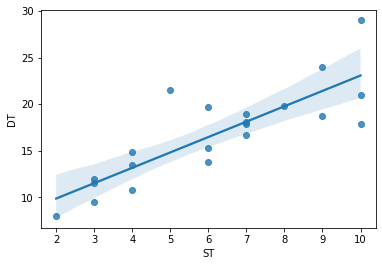

In [14]:
#Regresssion Plot
sns.regplot(x="ST", y="DT", data = dataset1 )

In [15]:
#Coefficients
dataset_1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [16]:
print(dataset_1.tvalues, '\n', dataset_1.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [17]:
(dataset_1.rsquared,dataset_1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [18]:
dataset_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 25 May 2022   Prob (F-statistic):           3.98e-06
Time:                        16:50:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here from above OLS regression results R-Squared value is 0.682 which is not greater than 0.85 hence we cannot say this model1 is good for predict Delivery TIme.
Here p value is less than 0.05, it is significant

In [19]:
def RMSE(predict, actual):
    return np.sqrt(((predict - actual) ** 2).mean())

In [20]:
#Checking the RMSE value
value_1= dataset_1.predict(dataset1.ST)

In [21]:
value_1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [22]:
actual = dataset1.DT

In [23]:
RMSE(value_1,actual)

2.7916503270617654

Model2 -
We will try to apply Transformation on variables to get higher R-squared value as to predict better model

In [24]:
#Applying Logarithim Transformation and predict a new model
dataset_2 = smf.ols('DT~np.log(ST)', data = dataset1).fit()

In [25]:
#Coefficients
dataset_2 .params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [26]:
dataset_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 25 May 2022   Prob (F-statistic):           2.64e-06
Time:                        16:50:34   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here as per above result in this case R-squared value is 0.695 which is greater than our model1 but not greater than 0.85. We can say model2 is better than model1 . But not the best fit model to predict Delivery_time

In [27]:
#Checking of RMSE value
value_2= dataset_2.predict(dataset1.ST)
value_2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [28]:
RMSE(value_2,actual)

2.7331714766820663

Model3 -
As in model2 the R-squared value is not also good. So we need to do another transformation to get better R-squared value.

In [29]:
#Applying Exponential transformation and predict a new model
dataset_3 = smf.ols('DT~np.exp(ST)', data = dataset1).fit()

In [30]:
#Coefficients
dataset_3 .params

Intercept     15.083578
np.exp(ST)     0.000393
dtype: float64

In [31]:
dataset_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 25 May 2022   Prob (F-statistic):            0.00396
Time:                        16:50:44   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(ST)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here as per above result in this case R-squared value is 0.361 which is lesser than 0.85. We cannot take this model to predict Delivery_time

In [32]:
#Checking of RMSE value
value_3= dataset_3.predict(dataset1.ST)
value_3

0     23.739082
1     15.105033
2     15.242109
3     18.267760
4     23.739082
5     15.242109
6     15.514510
7     15.091471
8     23.739082
9     18.267760
10    16.254973
11    15.105033
12    15.514510
13    15.091471
14    15.091471
15    15.105033
16    15.242109
17    15.514510
18    15.086482
19    15.514510
20    15.141898
dtype: float64

In [33]:
RMSE(value_3,actual)

3.958615702523664

Model4 - 
We need to do another transformation to get better R-squared value.

In [34]:
#Applying Reciprocal transformation and predict a new model
dataset_4 = smf.ols('DT~np.reciprocal(ST)', data = dataset1).fit()

In [35]:
#Coefficients
dataset_4.params

Intercept            16.790952
np.reciprocal(ST)     0.000000
dtype: float64

In [36]:
dataset_4.summary()

C:\Users\sowmya sandeep\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 25 May 2022   Prob (F-statistic):                nan
Time:                        16:50:51   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.7910      1.107     15.162      0.000      14.481      19.101
np.reciprocal(ST)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
#Checking of RMSE value
value_4= dataset_4.predict(dataset1.ST)
value_4

0     16.790952
1     16.790952
2     16.790952
3     16.790952
4     16.790952
5     16.790952
6     16.790952
7     16.790952
8     16.790952
9     16.790952
10    16.790952
11    16.790952
12    16.790952
13    16.790952
14    16.790952
15    16.790952
16    16.790952
17    16.790952
18    16.790952
19    16.790952
20    16.790952
dtype: float64

In [38]:
RMSE(value_4,actual)

4.952596149170659

Model5 -
We need to do another transformation to get better R-squared value.

In [39]:
#Applying squareroot transformation and predict a new model
dataset_5 = smf.ols('DT~np.sqrt(ST)', data = dataset1).fit()

In [40]:
#Coefficients
dataset_5.params

Intercept     -2.518837
np.sqrt(ST)    7.936591
dtype: float64

In [41]:
dataset_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 25 May 2022   Prob (F-statistic):           2.61e-06
Time:                        16:50:53   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
value_5= dataset_5.predict(dataset1.ST)
value_5

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [43]:
RMSE(value_5,actual)

2.731543210091211

Model6 -
We need to do another transformation to get better R-squared value.

In [44]:
#Applying exponential transformation in other way and predict a new model
dataset_6 = smf.ols('np.log(DT)~ST', data = dataset1).fit()

In [45]:
#Coefficients
dataset_6.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [46]:
dataset_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.59e-06
Time:                        16:50:54   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here as per above result in this case R-squared value is 0.711.
p- values is less than 0.05, it is significant

In [47]:
#Checking RMSE value and predict delivery time
value_6= np.exp(dataset_6.predict(dataset1.ST))
value_6

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [48]:
RMSE(value_6 ,actual)

2.9402503230562007

CONCLUSION - Comparing between all models , model6 has higher R-squared value i.e. 0.711 as comapare to others.
From the above data we know higher R-squred value and lower RMSE value gives better model.
Hence the Model-6 is better model to predict delivery_time